In [25]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
import openweathermapy.core as owm
from citipy import citipy
from random import uniform

# Google Places API Key from config
from config import key

In [26]:
#collect 500+ cities across the world of varying distance from the equator
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number, city name, and requested URL.
#Get Temp Latitude, humidity,cloudiness, wind speed (mph) from api
#Create scatter plots

In [27]:
#create random list of lat and long
#use citipy to find the nearest city to lat and long
#get api for each city from open weather mapy
city = citipy.nearest_city(0.00, 0.00)
city
city.city_name

'takoradi'

In [34]:
lat=[]
long=[]
city_names=[]
city_counter = 0
temp = []
latitude =[]
humidity =[]
cloudiness = []
wind_speed = []

#cities_pd["temp"] = ""
#creatins a random lat and lon
x, y = uniform(-180,180), uniform(-90, 90)
y

#collect 500+ cities across the world of varying distance from the equator
data_range = np.arange(1,550,1)
data_range

# Create settings dictionary with information we're interested in
settings = {"units": "Imperial", "appid": key}

#

for data in data_range:
    
    #counting the number of selected cities
    city_counter = city_counter + 1
    #creating random list of lat
    x = uniform(-180,180)
    
    #creaing random list of long
    y = uniform(-90, 90)
    
    #finding nearest city to the random corrdinate
    city = citipy.nearest_city(x, y)
    
    #finding the city name from nearest city from above 
    city_name=city.city_name
    if city_name in city_names:
        continue
    
    lat.append(x)
    long.append(y)
    city_names.append(city_name)
    
    
    #api for current weather for selected random city
    #current_weather = owm.get_current(city_name, **settings)
    
    try:
        current_weather = owm.get_current(city_name, **settings) 
    except:
        print("not city data")
        
    #print(current_weather)
    print(str(city_counter) +" " +str(city_name))
    #print(city_counter)
    
    #getting temp,latitute,humdity,cloudiness, wind spped
    temp.append(current_weather["main"]["temp"])
    humidity.append(current_weather["main"]["humidity"])
    cloudiness.append(current_weather["clouds"]["all"])
    wind_speed.append(current_weather["wind"]["speed"])
    latitude.append(current_weather["coord"]["lat"])
    
    #cities_pd.set_value(index,"temp",)
    
    
    #summary = ["name", "main.temp"]
    #data = current_weather(*summary)
    #print(data)
                                            

1 bredasdorp
2 mashhad
3 ushuaia
4 hermanus
5 narsaq
not city data
6 barentsburg
7 cape town
8 ribeira grande
9 quatre cocos
10 sao joao da barra
not city data
11 illoqqortoormiut
13 port elizabeth
14 sao filipe
16 klaksvik
17 viedma
19 cidreira
23 samus
not city data
24 karkaralinsk
25 dikson
27 hamilton
30 port alfred
not city data
32 amderma
33 victoria
34 longyearbyen
37 kulhudhuffushi
38 qaanaaq
39 albany
45 boyabat
47 marawi
49 ayna
50 bonthe
51 margate
not city data
57 marcona
58 sinnamary
59 vallenar
61 kamenka
not city data
62 glubokoe
64 kavaratti
69 lebu
70 soyo
76 shieli
not city data
82 taolanaro
84 kasempa
87 lagoa
89 gewane
not city data
97 grand river south east
101 chuy
102 salalah
104 black river
not city data
106 blonduos
108 jamestown
111 upernavik
115 vila velha
116 iqaluit
120 benjamin constant
121 okahandja
129 saint-philippe
130 arona
131 veraval
133 utiel
135 bathsheba
138 vardo
139 nalut
144 sheopur
147 normandin
not city data
150 sopot
152 busselton
not city 

In [35]:
print(json.dumps(current_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 11.42,
        "lon": -9.17
    },
    "dt": 1520786487,
    "id": 2415703,
    "main": {
        "grnd_level": 976.92,
        "humidity": 17,
        "pressure": 976.92,
        "sea_level": 1019.3,
        "temp": 98.92,
        "temp_max": 98.92,
        "temp_min": 98.92
    },
    "name": "Siguiri",
    "sys": {
        "country": "GN",
        "message": 0.0034,
        "sunrise": 1520750755,
        "sunset": 1520794032
    },
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 80.0008,
        "speed": 10.56
    }
}


In [36]:
temp_test=current_weather["wind"]["speed"]
temp_test


10.56

In [37]:
len(wind_speed)

162

In [38]:
# create dataframe with data from all the cities
weather_dict = {
    "City Name":city_names,
    "Temperature": temp,
    "humidity": humidity,
    "latitude": latitude,
    "cloudiness":cloudiness,
    "wind speed":wind_speed
} 
weather_dict
weather_df = pd.DataFrame(weather_dict)
len(weather_df)

162

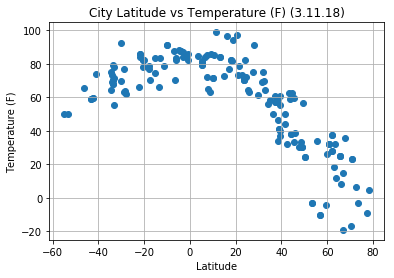

In [40]:
# Build a scatter plot for Temperature vs Latitude 
plt.scatter(weather_df["latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (F) (3.11.18)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
#plt.savefig("City Latitude vs Temperature (F) (3.11.18)")

# Show plot
plt.show() 

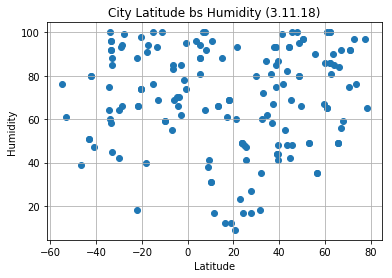

In [41]:
# Build a scatter plot for Humidity vs Latitude 
plt.scatter(weather_dict["latitude"], weather_dict["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (3.11.18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
#plt.savefig("City Latitude vs Humidity (3.11.18).png")

# Show plot
plt.show()

In [ ]:
# Build a scatter plot for Cloudiness vs Latitude 
plt.scatter(weather_dict["latitude"], weather_dict["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (3.11.18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
#plt.savefig("City Latitude vs Cloudiness (3.11.18).png")

# Show plot
plt.show() 

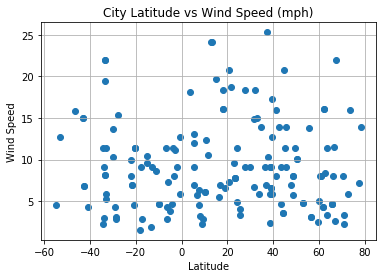

In [42]:
# Build a scatter plot for Cloudiness vs Latitude 
plt.scatter(weather_dict["latitude"], weather_dict["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (mph) (3.11.18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show() 

In [ ]:
#questions:
#1.All the information from the cities is not being added to the lists